In [19]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data_Kuchen"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
#test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
#print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (1462, 31)
Loaded Validation features dimensions: (357, 31)
Loaded Test features dimensions: (355, 31)

Loaded Training labels dimensions: (1462, 1)
Loaded Validation labels dimensions: (357, 1)

First few rows of loaded training features:
      Temp_Cold_current  Temp_Mild_current  Temp_Warm_current  \
7223                  0                  1                  0   
7224                  0                  1                  0   
7225                  0                  0                  1   
7226                  0                  1                  0   
7227                  0                  1                  0   

      Temp_Hot_current  Cloud_ok_current  Cloud_Cloudy_current  \
7223                 0                 0                     1   
7224                 0                 1                     0   
7225                 0                 0                     1   
7226                 0                 0                     1   
72

In [20]:
#Defining the Neural Network
#Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam # --> Optimierungsalgorithmus
import tensorflow as tf


#Sequential ermöglicht das Erstellen eines Modells mit einer Schicht nach der abnderen
#Dense sind die Schichten, die Eingaben mit Gewichten und einer Aktivierungsfunktion kombinieren
model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  Dropout(0.2),  
  #BatchNormalization(),
  Dense(50, activation='relu'),# --> 1. Schicht mit 10 Neuronen mit ReLU Aktivierungsfunktion (rectified linear unit), um Nichtlinearität in das Modell reinzubringen
  #Dropout(0.1),
  Dense(25, activation='relu'),
  Dense(1) # keine Aktivierugnsfunktion --> Regression (um kontinuierliche Were als Output zu erhalten)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 31)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,901 (11.33 KB)

 Trainable params: 2,901 (11.33 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compiling and Training the model with mean squared Error (MSE) as loss function and adam optimizer
model.compile(loss="mse", optimizer=Adam(learning_rate=0.0015, beta_1=0.95, beta_2=0.95), metrics = ['mae']) # Mean Absolute Error zur Überwachung

history = model.fit(training_features, training_labels, epochs=90, 
                    batch_size = 32, 
                    verbose =1,
                    validation_data=(validation_features, validation_labels))

# Infos zum Output:
# 235/235 bedeutet, dass Datensatz in 235 Batches aufgeteilt wurde und alle Batches für diese Epoche verarbeitet wurden
#1s 2ms/step: Zeit, die für die gesamte Epoche benötigt wurde (1 Sekunde) und durchschnittlich 2 Millisekunden pro Schritt
#loss: 63840.3867: Der Trainingsverlust (Loss) nach dieser Epoche. Ein hoher Wert bedeutet, dass das Modell noch weit davon entfernt ist, optimale Vorhersagen zu treffen.
#val_loss: 51443.0977: Der Validierungsverlust (Loss) für diese Epoche. Das ist der Verlust auf den Validierungsdaten, die nicht für das Training verwendet werden, sondern zur Überprüfung der Modellleistung dienen

Epoch 1/90


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 96272.6250 - mae: 284.1598 - val_loss: 72503.1250 - val_mae: 254.3971
Epoch 2/90
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84261.9453 - mae: 272.7737 - val_loss: 64556.4805 - val_mae: 238.2548
Epoch 3/90
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76400.5078 - mae: 255.1823 - val_loss: 48796.8633 - val_mae: 202.4601
Epoch 4/90
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53931.8945 - mae: 212.9780 - val_loss: 26966.3750 - val_mae: 137.7464
Epoch 5/90
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36701.7969 - mae: 149.7915 - val_loss: 10101.9971 - val_mae: 63.3952
Epoch 6/90
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16203.4502 - mae: 84.4725 - val_loss: 11833.0293 - val_mae: 80.3767
Epoch 7/90
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16942.5938 - mae: 78.4889 - val_loss: 8593.8604 - val_mae: 62.2881
Epoch 8/90
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17227.5547 - mae: 70.2099 - val_loss: 8383.3105 - val_mae: 62.1

In [22]:
# Saving the trained Model
model.save("python_model_Kuchen.h5")

In [23]:
# Making Predictions and Evaluating the Model
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAPE on the Training Data: 13.19%
MAPE on the Validation Data: 14.22%


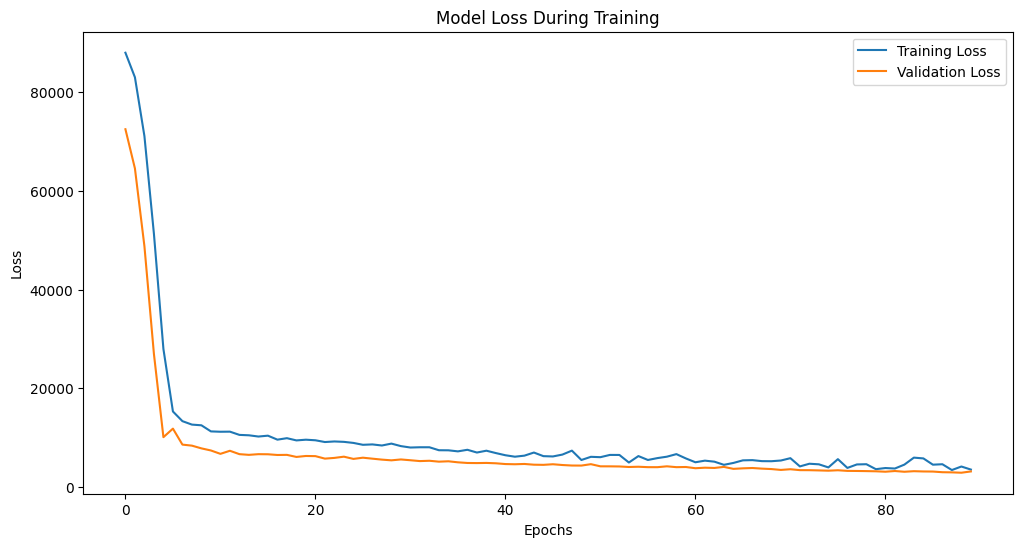

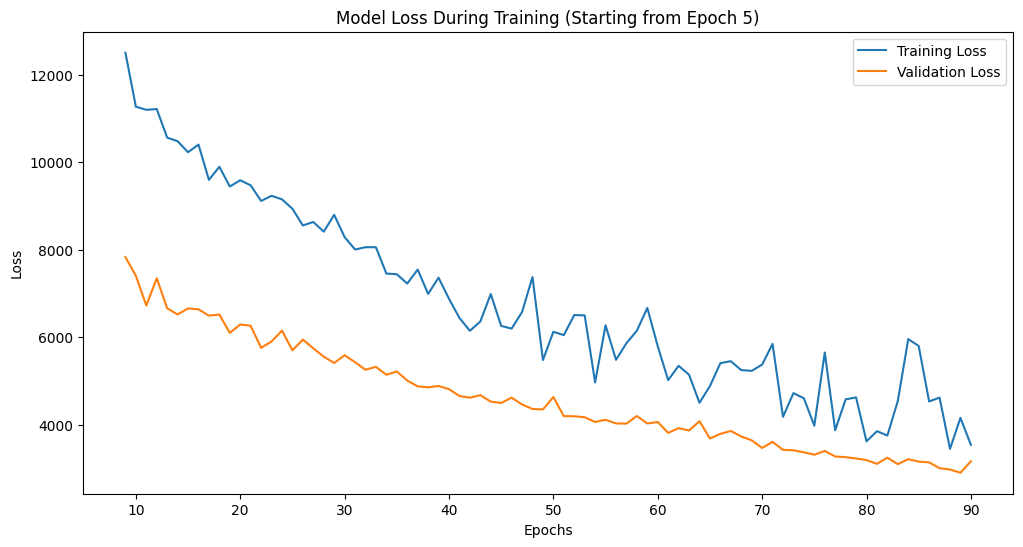

In [24]:
# Plotting Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training History (ab der 5. Epoche)
import matplotlib.pyplot as plt

# Schneide die Verlaufsdaten ab der 5. Epoche
epochs_to_plot = range(9, len(history.history['loss']) + 1)
training_loss = history.history['loss'][8:]
validation_loss = history.history['val_loss'][8:]

plt.figure(figsize=(12, 6))
plt.plot(epochs_to_plot, training_loss, label='Training Loss')
plt.plot(epochs_to_plot, validation_loss, label='Validation Loss')
plt.title('Model Loss During Training (Starting from Epoch 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


***VORHERSAGE TESTZEITRAUM***

In [25]:
test_predictions = model.predict(test_features)
#print("Predictions for test data:", test_predictions[:5])  # Display first 5 predictions
# Größe des Arrays anzeigen
print("Größe des Arrays (shape):", test_predictions.shape)
test_predictions = pd.DataFrame(test_predictions)
test_predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Größe des Arrays (shape): (355, 1)


,0
0,268.395477
1,254.897003
2,268.810364
3,283.327118
4,299.826691
...,...
350,237.247650
351,258.540192
352,269.915710
353,220.631226


In [26]:
data_test = pd.read_csv("/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/data_with_lag/Testdaten_with_lag.csv")
data_test = data_test[data_test["Warengruppe_5"] == 1]
data_test

,id,Datum,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold_current,Temp_Very_Cold_prev,...,zwischen_den_jahren_next,Number_of_ships_scaled_current,Number_of_ships_scaled_prev,Number_of_ships_scaled_next,Cloud_ok_current,Cloud_ok_prev,Cloud_ok_next,Wind_ok_current,Wind_ok_prev,Wind_ok_next
1419,1808015,2018-08-01,0,0,0,0,1,0,0,0.0,...,0.0,0.0,0.2,0.0,1,0.0,1.0,1,1.0,1.0
1420,1808025,2018-08-02,0,0,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,1,1.0,1.0,1,1.0,1.0
1421,1808035,2018-08-03,0,0,0,0,1,0,0,0.0,...,0.0,0.0,0.0,0.2,1,1.0,1.0,1,1.0,1.0
1422,1808045,2018-08-04,0,0,0,0,1,0,0,0.0,...,0.0,0.2,0.0,0.0,1,1.0,0.0,1,1.0,1.0
1423,1808055,2018-08-05,0,0,0,0,1,0,0,0.0,...,0.0,0.0,0.2,0.0,0,1.0,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,1907265,2019-07-26,0,0,0,0,1,0,0,0.0,...,0.0,0.0,0.2,0.6,1,0.0,1.0,1,1.0,0.0
1770,1907275,2019-07-27,0,0,0,0,1,0,0,0.0,...,0.0,0.6,0.0,0.4,1,1.0,1.0,0,1.0,1.0
1771,1907285,2019-07-28,0,0,0,0,1,0,0,0.0,...,0.0,0.4,0.6,0.2,1,1.0,0.0,1,0.0,1.0
1772,1907295,2019-07-29,0,0,0,0,1,0,0,0.0,...,0.0,0.2,0.4,0.2,0,1.0,0.0,1,1.0,1.0


In [27]:
# Erstelle Ziel csv Datei

predictions_df = pd.DataFrame({
    'id': data_test['id'].values,
    'Umsatz': test_predictions[0].values
}).reset_index(drop=True)

# Save to a CSV file
#output_csv_path = "/workspaces/bakery_sales_prediction/3_Model/02_Franz/V3_lag/Umsatzvorhersage_Kuchen_Hochladeformat.csv"

predictions_df.to_csv('Kuchen_Umsatzvorhersage.csv', index=False)
print(f"CSV Datei erstellt")

CSV Datei erstellt
